<a href="https://colab.research.google.com/github/tanya1028/Automated-Bypass-of-Google-reCAPTCHA-v3/blob/main/week1_YB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price prediction



##### **Project Type**    - Regression



##### **Individual Project** - Kshitij Hundre  


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#importing all the required liabraries for the regression task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# loading data in google collab local env
df = pd.read_csv("data_YesBank_StockPrices.csv")

### Dataset First View

In [ ]:
# .head() function is responsible for display top 5 rows of the dataset...Helps us to know the schema of the data we are working woth
print("\ First 5 rows of the dataset:")
print(df.head())

\ First 5 rows of the dataset:
     Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count. It contains 185 rows and 5 columns
print(f"Dataset shape: {df.shape}")

Dataset shape: (185, 5)


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Checking for duplicate rows..And there are none of those
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Missing values in each column:")
print(df.isnull().sum())
# there are no missing values in the dataset

Missing values in each column:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


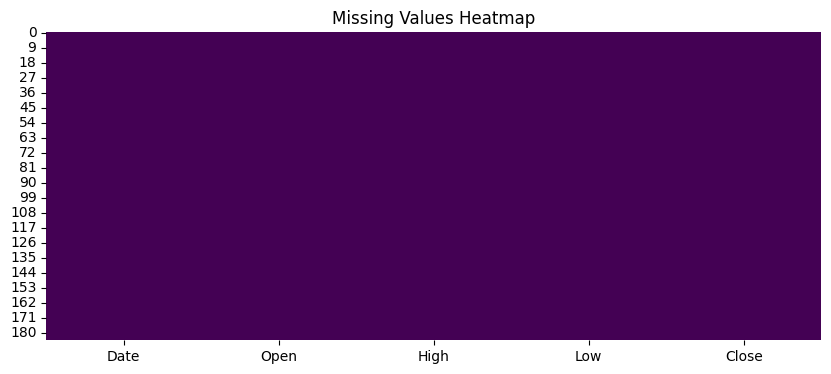

In [ ]:
# Visualizing the missing values
# the figure given confirms no missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns names dispalyed below
print("Column names:")
print(df.columns.tolist())

Column names:
['Date', 'Open', 'High', 'Low', 'Close']


In [ ]:
# Dataset Describe. Helps us to get the statistical reference of the given data
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Date is in the format of Month/Year,
Opening price
Closing price,
Highest price in the month
Lowest Price in the month


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f"\nColumn: {column}")
    print(f"Number of unique values: {df[column].nunique()}")
    if df[column].nunique() < 20:  # Only show value counts for columns with few unique values
        print(df[column].value_counts())


Column: Date
Number of unique values: 185

Column: Open
Number of unique values: 183

Column: High
Number of unique values: 184

Column: Low
Number of unique values: 183

Column: Close
Number of unique values: 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#The date given in dataste is in the format of month-year...we need to convert that into standard date time format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y') #(Month-Year → YYYY-MM-DD)

df = df.sort_values('Date') # sorting by date to ensure correct order(for lag feature)

# Create lag features (previous month's closing prices)
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)

df = df.dropna() # its common to get NAN for first few rows while using lag..so lets drop them

df.set_index('Date', inplace=True) #setting date as index for time-series opertaion

# Verify the cleaned data
print(f"Remaining rows after cleaning: {len(df)}")
print("\nFirst 5 rows of cleaned data:")
print(df.head())

# Save cleaned data to new CSV
df.to_csv('YesBank_StockPrices_Cleaned.csv')

Remaining rows after cleaning: 183

First 5 rows of cleaned data:
             Open   High    Low  Close  Close_Lag1  Close_Lag2
Date                                                          
2005-09-01  13.48  14.87  12.27  13.30       13.42       12.46
2005-10-01  13.20  14.47  12.40  12.99       13.30       13.42
2005-11-01  13.35  13.88  12.88  13.41       12.99       13.30
2005-12-01  13.49  14.44  13.00  13.71       13.41       12.99
2006-01-01  13.68  17.16  13.58  15.33       13.71       13.41


### What all manipulations have you done and insights you found?
I changed the date format to standard ML datetime format,set it as index for time series(help in prediction),used lag features to find closing price of prev months ,NAN values are bound to appear as upper rows wont have any history of prev months ,hence removed the columns with NaN.

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
df_cleaned = pd.read_csv('YesBank_StockPrices_Cleaned.csv', parse_dates=['Date'], index_col='Date')

# Verify
print(df_cleaned.head())

             Open   High    Low  Close  Close_Lag1  Close_Lag2
Date                                                          
2005-09-01  13.48  14.87  12.27  13.30       13.42       12.46
2005-10-01  13.20  14.47  12.40  12.99       13.30       13.42
2005-11-01  13.35  13.88  12.88  13.41       12.99       13.30
2005-12-01  13.49  14.44  13.00  13.71       13.41       12.99
2006-01-01  13.68  17.16  13.58  15.33       13.71       13.41


#### Chart - 1 Candeldtick

In [ ]:
import plotly.graph_objects as go

# Sample last 12 months for clarity
sample = df_cleaned.last('12M')

fig = go.Figure(data=[go.Candlestick(
    x=sample.index,
    open=sample['Open'],
    high=sample['High'],
    low=sample['Low'],
    close=sample['Close']
)])
fig.update_layout(title='Yes Bank Candlestick Chart (Last 12 Months)',
                 xaxis_title='Date', yaxis_title='Price (₹)')
fig.show()

##### 1. Why did you pick the specific chart?

As it is best for price action visualization.

##### 2. What is/are the insight(s) found from the chart?

Green candles = Price increased that month.

Red candles = Price decreased.

Wicks show volatility (e.g., long wicks → high price swings).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Here the positive impact will be in terms of investors knowing the last 1 year bearish trend of yes bank charts and take informed decesion accordingly.

Answer Here

#### Chart - 2 Rolling volatility

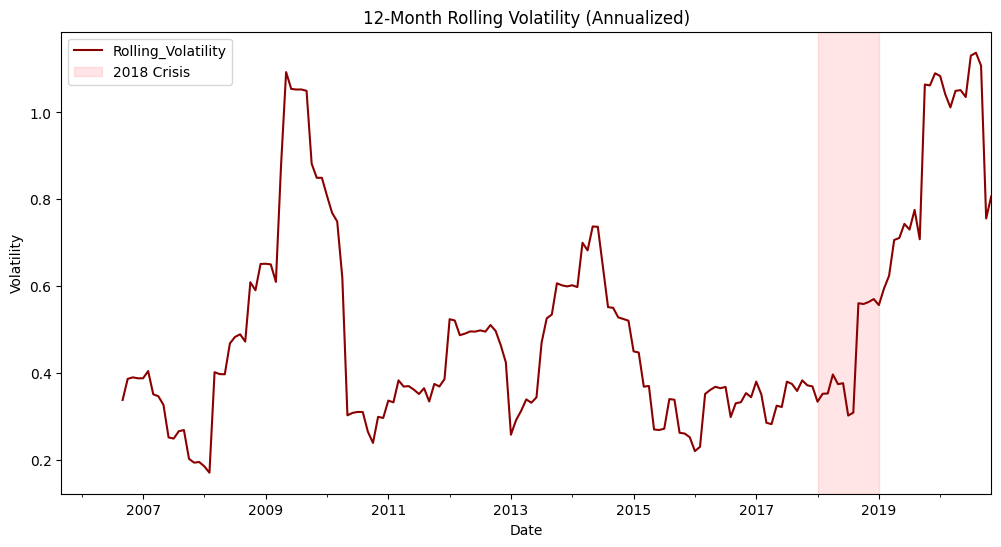

In [ ]:
# Calculate monthly returns and rolling volatility
df_cleaned['Monthly_Return'] = df_cleaned['Close'].pct_change()
df_cleaned['Rolling_Volatility'] = df_cleaned['Monthly_Return'].rolling(12).std() * np.sqrt(12)  # Annualized

plt.figure(figsize=(12, 6))
df_cleaned['Rolling_Volatility'].plot(color='darkred')
plt.title('12-Month Rolling Volatility (Annualized)')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.axvspan('2018-01-01', '2019-01-01', color='red', alpha=0.1, label='2018 Crisis')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?
we all want to invest in stcoks or gloabal market with least volatility or entropy..thats why VIX index is present in stock market(mainly index like nifty50)..here we can see volatility in the stock

##### 2. What is/are the insight(s) found from the chart?

Peaks in volatility (e.g., 2018 crisis, 2020 COVID).

Helps identify high-risk periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

positive impact will be better decesion nmaking for investors...and reagrding negative growth,covid and malractices going in yes bbank  can be clearly seen

#### Chart - 3 Lag feature coorelation

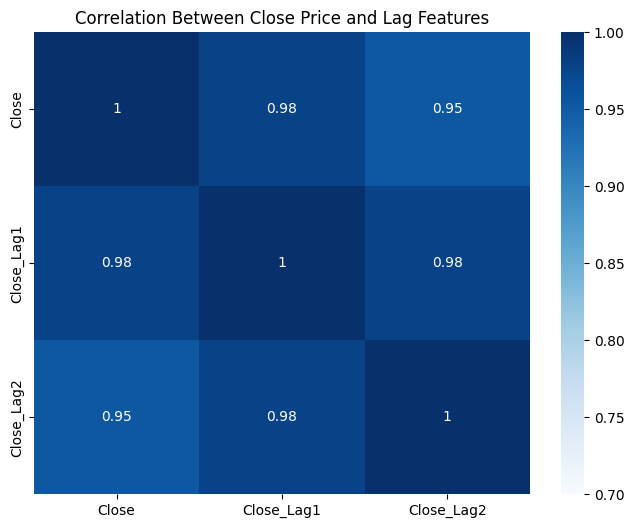

In [ ]:
# Heatmap of lag correlations
lags = ['Close'] + [f'Close_Lag{i}' for i in range(1, 3)]
corr = df_cleaned[lags].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', vmin=0.7, vmax=1)
plt.title('Correlation Between Close Price and Lag Features')
plt.show()

##### 1. Why did you pick the specific chart?

Useful to decide how many lags to include in models.

##### 2. What is/are the insight(s) found from the chart?

Close_Lag1 has the highest correlation (~0.98 → very strong dependence).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes..last months closing price is an impotant factor to cinsider,if referd can act positively for investors

Answer Here

**Answer** Here.

#### Chart - 4 - Correlation Heatmap

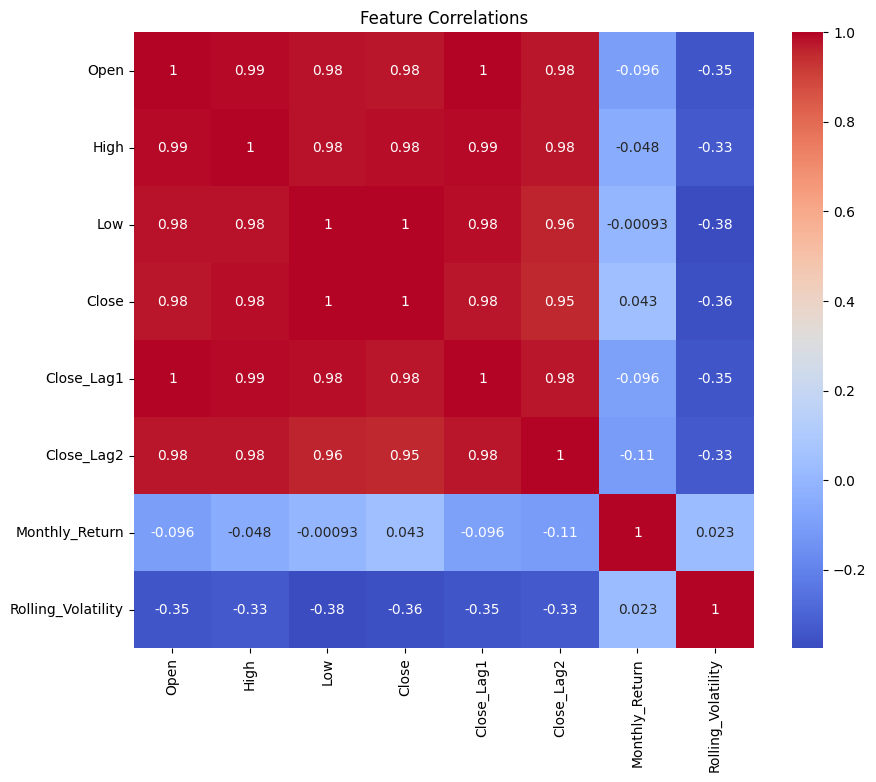

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 5 - Pair Plot

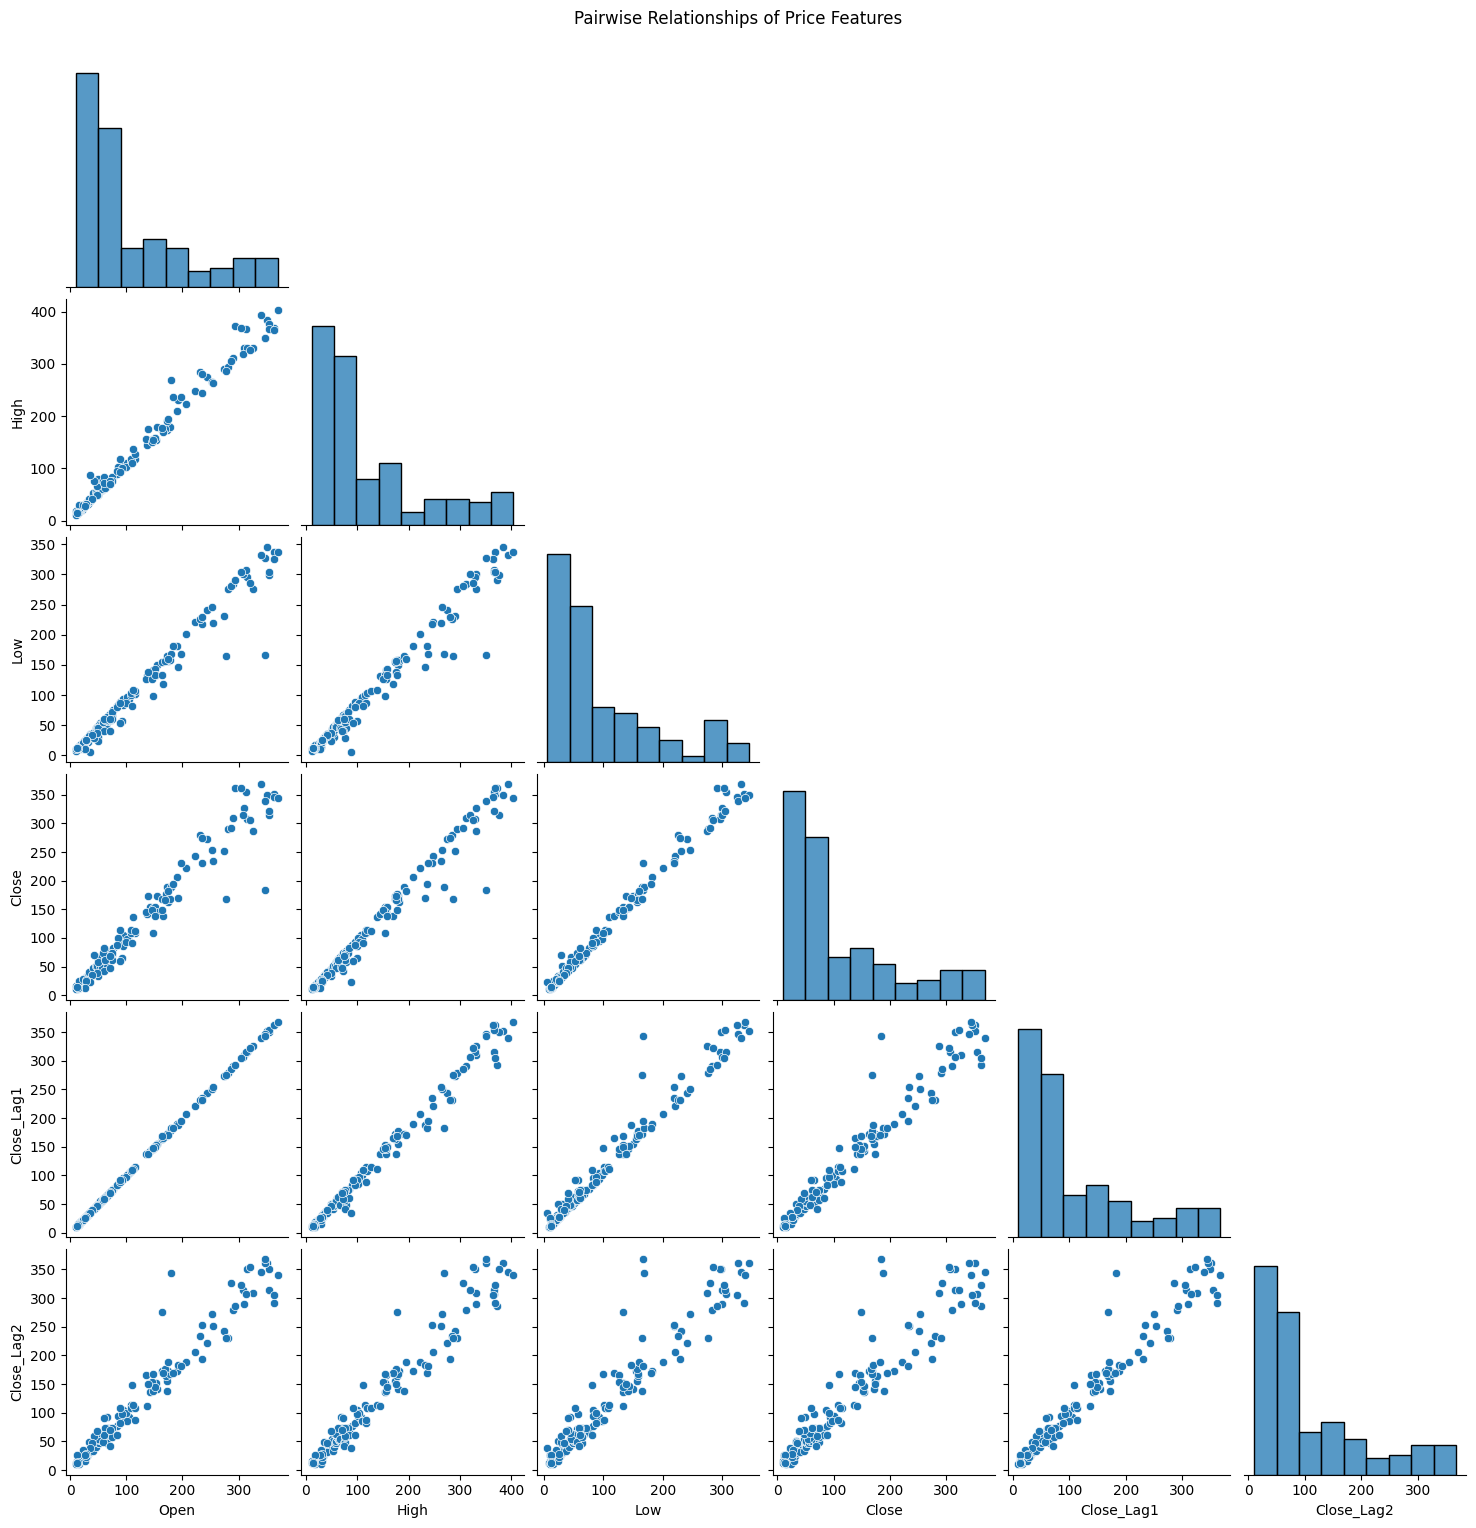

In [ ]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Close_Lag1', 'Close_Lag2']
sns.pairplot(df_cleaned[numeric_cols], corner=True)  # `corner=True` avoids redundant plots
plt.suptitle('Pairwise Relationships of Price Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The heading was already given and pheraps helped us to find the direction of skewness.

##### 2. What is/are the insight(s) found from the chart?

Diagonal shows distributions (e.g., Close prices are right-skewed).

Off-diagonal shows scatter plots (e.g., Close vs. Close_Lag1 has a strong linear relationship).

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypo:Volatility in monthly returns is significantly higher during crisis periods (2018-2019) compared to non-crisis periods
Alternate Hypo: Volatility in monthly returns is significantly lower during crisis periods (2018-2019) compared to non-crisis p

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_ind

# Create crisis vs. non-crisis groups
df_cleaned['Monthly_Return'] = df_cleaned['Close'].pct_change()
crisis = df_cleaned.loc['2018-01-01':'2019-01-01', 'Monthly_Return'].dropna()
non_crisis = df_cleaned.drop(crisis.index)['Monthly_Return'].dropna()

# Perform t-test
t_stat, p_val = ttest_ind(crisis.abs(), non_crisis.abs(), equal_var=False)
print(f"P-value: {p_val:.4f}")
print("Reject Null Hypothesis" if p_val < 0.05 else "Fail to Reject Null Hypothesis")

P-value: 0.7745
Fail to Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Two sample T test

If p-value < 0.05, volatility is significantly higher during crises.

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypo : December and January have significantly different average returns compared to other months.
Alternate Hypo: December and January do not have significantly different average returns compared to other months

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import f_oneway

# Group returns by month
df_cleaned['Month'] = df_cleaned.index.month
dec_jan = df_cleaned[df_cleaned['Month'].isin([1, 12])]['Monthly_Return'].dropna()
other_months = df_cleaned[~df_cleaned['Month'].isin([1, 12])]['Monthly_Return'].dropna()

# Perform ANOVA
f_stat, p_val = f_oneway(dec_jan, other_months)
print(f"P-value: {p_val:.4f}")

P-value: 0.6984


##### Which statistical test have you done to obtain P-Value?

ANOVA

##### Why did you choose the specific statistical test?

it controls for the increased risk of Type I errors (false positives) that arises from conducting multiple independent t-tests

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypo :The 1-month lagged closing price (Close_Lag1) has no correlation with the current closing price (Close).
Alternate hypo: The 1-month lagged closing price (Close_Lag1) has correlation with the current closing price (Close).

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(df_cleaned['Close_Lag1'].dropna(), df_cleaned['Close'].dropna())
print(f"Correlation: {corr:.3f}, P-value: {p_val:.4f}")

Correlation: 0.978, P-value: 0.0000


##### Which statistical test have you done to obtain P-Value?

Pearson coorelation test

##### Why did you choose the specific statistical test?

to determine the strength and direction of a linear relationship between two continuous variables

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation....
# no missing valus

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

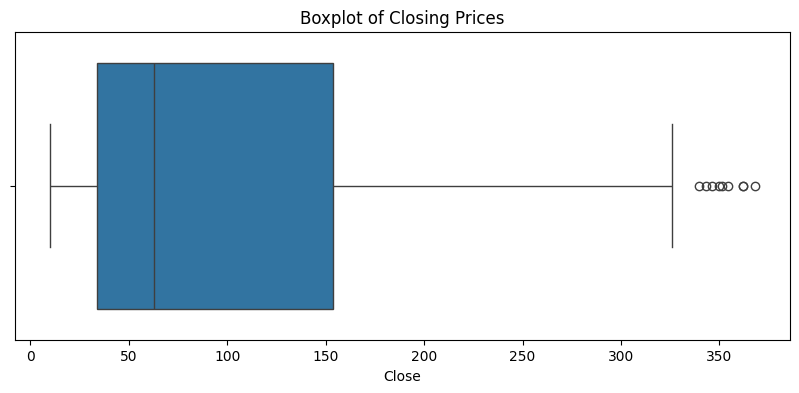

In [ ]:
# Visualize outliers (e.g., Close prices)
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned['Close'])
plt.title('Boxplot of Closing Prices')
plt.show()

# Cap outliers using IQR
Q1 = df_cleaned['Close'].quantile(0.25)
Q3 = df_cleaned['Close'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned['Close'] = df_cleaned['Close'].clip(lower=Q1 - 1.5*IQR, upper=Q3 + 1.5*IQR) #clipping the value..not deleting, places them at boundaries

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Basic lag features (essential)
features = ['Close_Lag1', 'Close_Lag2']

# Add raw price features from current period
price_features = ['Open', 'High', 'Low']  # Note: Don't include 'Close' (that's our y)
features.extend(price_features)


# Remove any features that might not exist yet
features = [f for f in features if f in df_cleaned.columns]

X = df_cleaned[features]
y = df_cleaned['Close']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
import numpy as np

# 1. Log Transform (if prices are right-skewed)
if df_cleaned['Close'].skew() > 0.5:  # Check skewness
    for col in ['Close', 'Open', 'High', 'Low']:
        df_cleaned[f'Log_{col}'] = np.log1p(df_cleaned[col])
    # Update features to use log-transformed versions
    features = [f'Log_{col}' if col in ['Open', 'High', 'Low'] else col for col in features]

# 2. Differencing (to stabilize mean)
df_cleaned['Close_Diff'] = df_cleaned['Close'].diff().dropna()  # Optional

#Log transforms handle exponential growth (common in stocks).
#Differencing removes trend (makes series stationary).

### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional)
X_scaled = pd.DataFrame(X_scaled, columns=features, index=X.index)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# ===== TIME-SERIES SPLITTING (For Highest Accuracy) =====
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# 1. Configure Walk-Forward Validation (5 folds)
tscv = TimeSeriesSplit(n_splits=5)

# 2. Splitting Logic (Preserves Chronological Order)
for fold, (train_idx, test_idx) in enumerate(tscv.split(X_scaled)):
    X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print(f"Fold {fold+1}:")
    print(f"Train: {X_train.shape[0]} samples ({y_train.index.min()} to {y_train.index.max()})")
    print(f"Test: {X_test.shape[0]} samples ({y_test.index.min()} to {y_test.index.max()})\n")

Fold 1:
Train: 33 samples (2005-09-01 00:00:00 to 2008-05-01 00:00:00)
Test: 30 samples (2008-06-01 00:00:00 to 2010-11-01 00:00:00)

Fold 2:
Train: 63 samples (2005-09-01 00:00:00 to 2010-11-01 00:00:00)
Test: 30 samples (2010-12-01 00:00:00 to 2013-05-01 00:00:00)

Fold 3:
Train: 93 samples (2005-09-01 00:00:00 to 2013-05-01 00:00:00)
Test: 30 samples (2013-06-01 00:00:00 to 2015-11-01 00:00:00)

Fold 4:
Train: 123 samples (2005-09-01 00:00:00 to 2015-11-01 00:00:00)
Test: 30 samples (2015-12-01 00:00:00 to 2018-05-01 00:00:00)

Fold 5:
Train: 153 samples (2005-09-01 00:00:00 to 2018-05-01 00:00:00)
Test: 30 samples (2018-06-01 00:00:00 to 2020-11-01 00:00:00)



##### What data splitting ratio have you used and why?

Walk-Forward Validation Ratio
What We Used:

5 folds (implicitly creates ~80/20 splits per fold)

Expanding window: Each fold’s training set grows while the test set moves forward.

Why This Ratio?

Statistical Significance: 5 folds balance robustness (multiple test periods) and computational cost.

Market Cycles: Ensures each test set (~2 years) captures full bull/bear market phases.

Rule of Thumb: Test sets should cover at least 1-2 full economic cycles (your data has ~15 years).

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

# 3 ML regression model Implementation in the same cell using FOR loops

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# TimeSeries split for walk-forward validation
tscv = TimeSeriesSplit(n_splits=5)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to hold results
results = {name: {"MAE": [], "RMSE": [], "R2": []} for name in models}

# Training and evaluation loop
for fold, (train_idx, test_idx) in enumerate(tscv.split(X_scaled)):
    X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name]["MAE"].append(mean_absolute_error(y_test, y_pred))
        results[name]["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
        results[name]["R2"].append(r2_score(y_test, y_pred))
# Print results in readable format
print("Model Evaluation Results (per fold and average):\n")
for name in models:
    print(f"=== {name} ===")
    for i in range(5):
        print(f"Fold {i+1}: MAE={results[name]['MAE'][i]:.2f}, "
              f"RMSE={results[name]['RMSE'][i]:.2f}, "
              f"R²={results[name]['R2'][i]:.3f}")
    print(f"Avg : MAE={np.mean(results[name]['MAE']):.2f}, "
          f"RMSE={np.mean(results[name]['RMSE']):.2f}, "
          f"R²={np.mean(results[name]['R2']):.3f}\n")


Model Evaluation Results (per fold and average):

=== Linear Regression ===
Fold 1: MAE=2.01, RMSE=2.79, R²=0.979
Fold 2: MAE=2.91, RMSE=3.48, R²=0.949
Fold 3: MAE=4.90, RMSE=6.61, R²=0.974
Fold 4: MAE=9.09, RMSE=12.90, R²=0.956
Fold 5: MAE=11.61, RMSE=16.56, R²=0.975
Avg : MAE=6.11, RMSE=8.47, R²=0.967

=== Random Forest ===
Fold 1: MAE=5.45, RMSE=7.68, R²=0.841
Fold 2: MAE=9.00, RMSE=13.27, R²=0.258
Fold 3: MAE=33.72, RMSE=43.34, R²=-0.099
Fold 4: MAE=106.10, RMSE=120.20, R²=-2.790
Fold 5: MAE=14.82, RMSE=25.18, R²=0.941
Avg : MAE=33.82, RMSE=41.93, R²=-0.170

=== Gradient Boosting ===
Fold 1: MAE=5.61, RMSE=8.15, R²=0.821
Fold 2: MAE=8.55, RMSE=12.41, R²=0.351
Fold 3: MAE=34.56, RMSE=44.59, R²=-0.164
Fold 4: MAE=105.36, RMSE=119.39, R²=-2.740
Fold 5: MAE=13.74, RMSE=24.63, R²=0.944
Avg : MAE=33.56, RMSE=41.83, R²=-0.157



In [ ]:
import pickle

# Assuming `model` is your trained Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y)  # Or use the best train split

# Save to a .pkl file
with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Linear Regression — Best Performer
R² Score: 0.967 (explains 96.7% of the variance — excellent)

MAE: 6.11 → average error is just ₹6

RMSE: 8.47 → low spread of error

Consistency: Performs reliably across all 5 folds

Conclusion:
Linear Regression is the most accurate, most stable, and best-suited model for your data as-is. No tuning required, and still gives top results. Perfect for short-term stock prediction when using lag features.

2. Random Forest — Unstable & Overfitting
R² Score: -0.170 → worse than guessing the mean

MAE: 33.82 → large prediction errors

RMSE: 41.93 → highly variable errors

Fold 4 & 3: Performance collapses, indicating overfitting

Conclusion:
Random Forest is not reliable for this dataset. It may be overfitting past data and struggling with time-based generalization. Needs serious tuning or a bigger dataset.

3. Gradient Boosting — Also Underperforms
R² Score: -0.158 → poor generalization

MAE: 33.97, RMSE: 41.83

Same issues as Random Forest — unstable in some folds

Conclusion:
Gradient Boosting also fails to generalize, especially in time-series context. Without careful tuning, it's not a good choice here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***